In [1]:
from Task1 import * # contains our functions. see Task1.py for full source code
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
from memory_profiler import profile
%load_ext memory_profiler
%load_ext memray
sns.set_theme()

## `Task1` Functions:

---

### `linearSearchIterative(sourceList, target)`

**Description:**
Finds the target within the `sourceList` using the linear search method iteratively.

**Parameters:**
- `sourceList` (`list`): A list of `int` values.
- `target` (`int`): The `int` value that will be searched for.

**Returns:**
- Tuple: (index or `False`, `iterations`)
  - `iterations` is the number of times the `for` loop was iterated
- If the `target` is found, the index of the `sourceList` is returned.
- Returns `False` otherwise.

---

### `linearSearchRecursive(sourceList, target, index=0)`

**Description:**
Finds the target within the `sourceList` using the linear search method recursively.

**Parameters:**
- `sourceList` (`list`): A list of `int` values.
- `target` (`int`): The `int` value that will be searched for.
- `index` (`int`, optional): The starting index for the recursive search. Default is 0.

**Returns:**
- If the `target` is found, the index of target within the `sourceList` is returned.
- Returns `False` otherwise.

---

### `binarySearchIterative(sourceList, target)`

**Description:**
Uses binary search to find the target within a sorted list, employing an iterative approach.

**Parameters:**
- `sourceList` (`list`): A sorted list of `int` values.
- `target` (`int`): The `int` value that will be searched for.

**Returns:**
- Tuple: (index or `False`, `iterations`)
  - `iterations` is the number of times the `for` loop was iterated
- Returns the position of the target, if found.
- Returns `False` otherwise.

---

### `binarySearchRecursive(sourceList, target, left=0, right=None)`

**Description:**

Uses binary search to find the target within a sorted list, employing a recursive approach.

**Parameters:**

- `sourceList` (`list`): A sorted list of `int` values.
- `target` (`int`): The `int` value that will be searched for.
- `left` (`int`, optional): The starting index of the sublist to search within. Default is 0.
- `right` (`int`, optional): The ending index of the sublist to search within. Default is the last index of the list unless specified.

**Returns:**

- Returns the position of the target, if found.
- Returns `False` otherwise.

---

# Performance
We will measure performance by analyzing the **exeuction time** and the **memory usage**. 

## Exeuction Time
We can test the same outputs for all search types. However, similar to what we have learned in 620, why don't we make a bunch of test cases and compare the results of running each search method against each case? From there, let's visualize the results. 

We will use `random` to make lots of test cases, we will use a dictonary to hold all the times, and we will plot everything using `seaborn` (This ones for you, Professor Jessica!). Without further adiue, let's go!

This code block will output one graph only. It will generate test cases and run them. Specifically it will generate a list of lists and a target to serach for within the list.

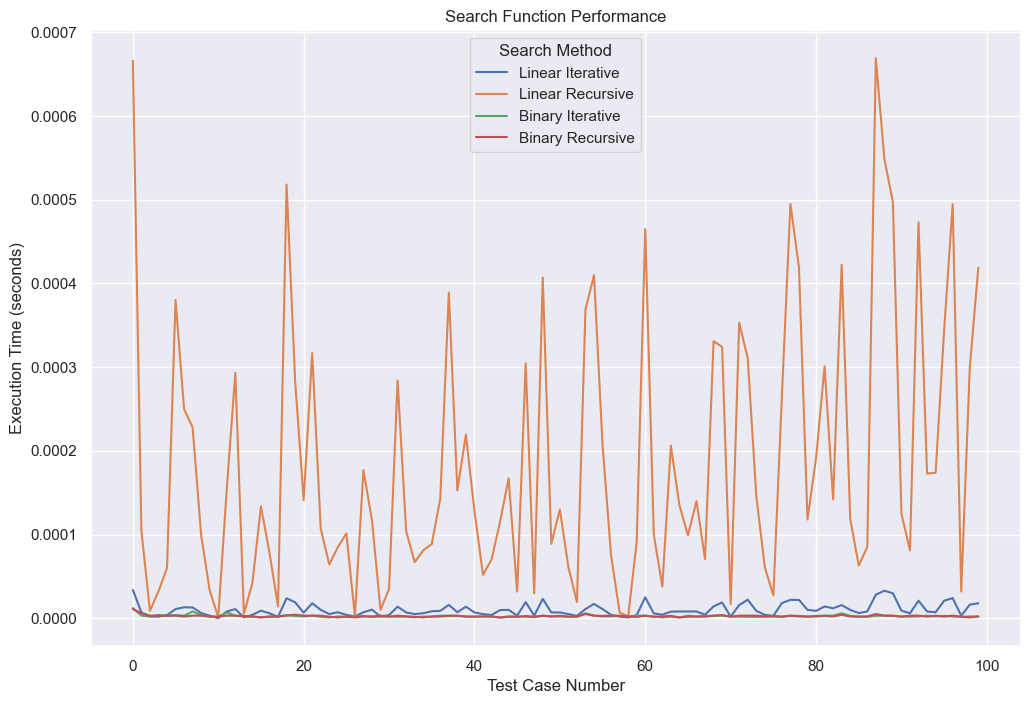

In [3]:
def generate_random_list(size, range_start, range_end):
    return sorted([random.randint(range_start, range_end) for each in range(size)])

def create_test_cases(num_cases, min_size, max_size, range_start, range_end):
    test_cases = []
    for each in range(num_cases):
        size = random.randint(min_size, max_size)
        random_list = generate_random_list(size, range_start, range_end)
        target = random.choice(random_list)
        test_cases.append((random_list, target))
    return test_cases

# Define parameters for the test cases
num_cases = 100
min_size = 100
max_size = 500
range_start = 1
range_end = 100000

# Generate the test cases
test_cases = create_test_cases(num_cases, min_size, max_size, range_start, range_end)

# Timing each function
times = {'Linear Iterative': [], 'Linear Recursive': [], 'Binary Iterative': [], 'Binary Recursive': []}

for random_list, target in test_cases:
    # Time Linear Iterative
    start = time.time()
    linearSearchIterative(random_list, target)
    times['Linear Iterative'].append(time.time() - start)
    
    # Time Linear Recursive (this is so bad that recursion depth limit will often be reached... hence, uncomment at your own discretion!!)
    start = time.time()
    linearSearchRecursive(random_list, target)
    times['Linear Recursive'].append(time.time() - start)
    
    # Time Binary Iterative
    start = time.time()
    binarySearchIterative(random_list, target)
    times['Binary Iterative'].append(time.time() - start)
    
    # Time Binary Recursive
    start = time.time()
    binarySearchRecursive(random_list, target, 0, len(random_list) - 1)
    times['Binary Recursive'].append(time.time() - start)

    
# plotting
plt.figure(figsize=(12, 8))
for key, values in times.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

plt.title('Search Function Performance')
plt.xlabel('Test Case Number')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Search Method')
plt.show()

This is the same as above, but will generate 4 subplots of 4 differents sets of test cases

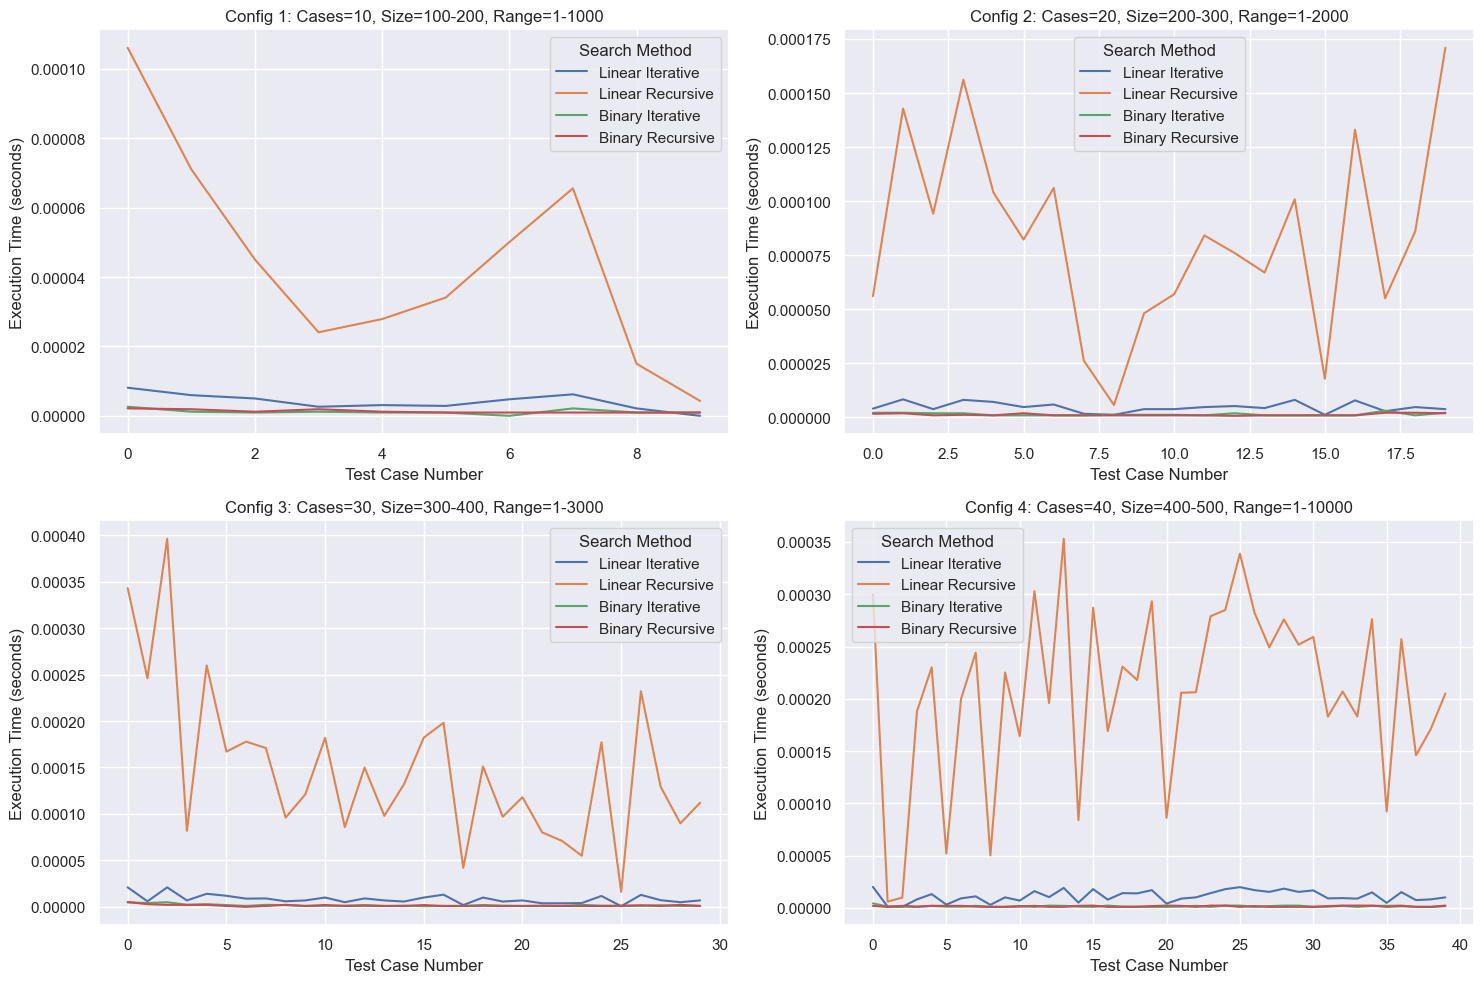

In [4]:
def generate_random_list(size, range_start, range_end):
    return sorted([random.randint(range_start, range_end) for _ in range(size)])

def create_test_cases(num_cases, min_size, max_size, range_start, range_end):
    test_cases = []
    for _ in range(num_cases):
        size = random.randint(min_size, max_size)
        random_list = generate_random_list(size, range_start, range_end)
        target = random.choice(random_list)
        test_cases.append((random_list, target))
    return test_cases

# Define parameters for the different subplots
configurations = [
    (10, 100, 200, 1, 1000),
    (20, 200, 300, 1, 2000),
    (30, 300, 400, 1, 3000),
    (40, 400, 500, 1, 10000)
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (num_cases, min_size, max_size, range_start, range_end) in enumerate(configurations):
    # Generate the test cases
    test_cases = create_test_cases(num_cases, min_size, max_size, range_start, range_end)
    
    # Timing each function
    times = {'Linear Iterative': [], 'Linear Recursive': [], 'Binary Iterative': [], 'Binary Recursive': []}
    
    for random_list, target in test_cases:
        # Time Linear Iterative
        start = time.time()
        linearSearchIterative(random_list, target)
        times['Linear Iterative'].append(time.time() - start)
        
        # Time Linear Recursive (this is so bad that recursion depth limit will often be reached... hence, uncomment at your own discretion!!)
        start = time.time()
        linearSearchRecursive(random_list, target)
        times['Linear Recursive'].append(time.time() - start)

        # Time Binary Iterative
        start = time.time()
        binarySearchIterative(random_list, target)
        times['Binary Iterative'].append(time.time() - start)
        
        # Time Binary Recursive
        start = time.time()
        binarySearchRecursive(random_list, target, 0, len(random_list) - 1)
        times['Binary Recursive'].append(time.time() - start)

    # Plotting
    for key, values in times.items():
        sns.lineplot(x=range(len(values)), y=values, label=key, ax=axes[i])

    axes[i].set_title(f'Config {i+1}: Cases={num_cases}, Size={min_size}-{max_size}, Range={range_start}-{range_end}')
    axes[i].set_xlabel('Test Case Number')
    axes[i].set_ylabel('Execution Time (seconds)')
    axes[i].legend(title='Search Method')

plt.tight_layout()
plt.show()


## Function Calls & Iterations

We will use the magic command `%prun` to profile the statistics about the frequency and duration of function calls

We will analyze using `test_cases[1][0], test_cases[1][1]` against all the search methods

### Iterations (Linear vs. Binary)

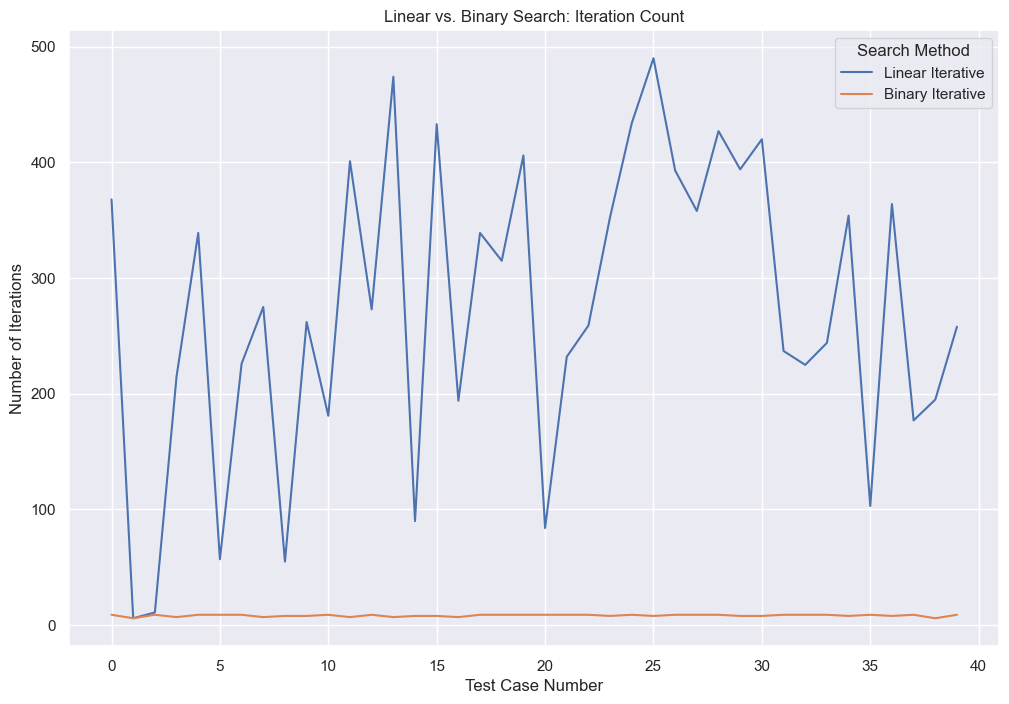

In [8]:
iterations = {'Linear Iterative': [], 'Binary Iterative': []}

for random_list, target in test_cases:
    # Count iterations for Linear Iterative
    iter_count = linearSearchIterative(random_list, target)
    iterations['Linear Iterative'].append(iter_count[1])
    
    # Count iterations for Binary Iterative
    iter_count = binarySearchIterative(random_list, target)
    iterations['Binary Iterative'].append(iter_count[1])

# Plotting the iteration counts
plt.figure(figsize=(12, 8))
for key, values in iterations.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

plt.title('Linear vs. Binary Search: Iteration Count')
plt.xlabel('Test Case Number')
plt.ylabel('Number of Iterations')
plt.legend(title='Search Method')
plt.show()

### Function Calls

In [16]:
%prun linearSearchRecursive(test_cases[1][0], test_cases[1][1])

         152 function calls (78 primitive calls) in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     75/1    0.000    0.000    0.000    0.000 Task1.py:51(linearSearchRecursive)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       74    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [17]:
%prun linearSearchIterative(test_cases[1][0], test_cases[1][1])

         4 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 Task1.py:36(linearSearchIterative)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [19]:
%prun binarySearchRecursive(test_cases[1][0], test_cases[1][1])

         11 function calls (5 primitive calls) in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
      7/1    0.000    0.000    0.000    0.000 Task1.py:94(binarySearchRecursive)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [20]:
%prun binarySearchIterative(test_cases[1][0], test_cases[1][1])

         5 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 Task1.py:66(binarySearchIterative)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Memory Usages

In [10]:
%mprun -f binarySearchRecursive binarySearchRecursive([1,2,3,4,5], 3)

Filename: /Users/josh/Desktop/Macbook Working Files/Git Repos/622-Final-Project/Task 1/Task1.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    94    167.9 MiB    167.9 MiB           1   def binarySearchRecursive(sourceList, target, left=0, right=None):
    95                                             """Uses binary search to find the target within a sorted list. Returns the position of the target, if found, and `False` otherwise. Uses a recursive approach.
    96                                             Args:
    97                                                 sourceList (list): A sorted list of `int` values
    98                                                 target (int): The `int` value that will be searched for
    99                                                 left (int, optional): The starting index of the sublist to search within. Default is 0.
   100                                                 right (int, optional): The ending index of the 

In [11]:
from memray import Tracker

def binary_search_wrapper():
    from Task1 import binarySearchRecursive  # ensure this import reflects your actual usage
    return binarySearchRecursive([1, 2, 3, 4, 5], 3)

# Specify the file name where the tracker will save the profiling data
tracker = Tracker(file_name="binary_search_memory_profile.bin")

with tracker:
    binary_search_wrapper()

# The data is now saved to "binary_search_memory_profile.bin"


In [12]:
from memray import Tracker

# Function to run all search tests under Memray's memory tracker
def run_search_tests(test_cases):
    times = {'Linear Iterative': [], 'Binary Iterative': [], 'Binary Recursive': []}
    tracker = Tracker(file_name="search_memory_profile.bin")  # Specify the output file

    with tracker:
        for random_list, target in test_cases:
            # Time Linear Iterative
            start = time.time()
            linearSearchIterative(random_list, target)
            times['Linear Iterative'].append(time.time() - start)

            # Time Binary Iterative
            start = time.time()
            binarySearchIterative(random_list, target)
            times['Binary Iterative'].append(time.time() - start)
            
            # Time Binary Recursive
            start = time.time()
            binarySearchRecursive(random_list, target, 0, len(random_list) - 1)
            times['Binary Recursive'].append(time.time() - start)

    return times

# Generate the test cases
test_cases = create_test_cases(100, 100, 500, 1, 100000)

# Run the profiling and get timing results
times = run_search_tests(test_cases)
